# House Price Prediction

Task #1: Understand the Problem Statement and Business Case

The task is to develop a predictive model that can accurately estimate the prices of residential houses based on various features and attributes associated with each property.

Task #2: Import Libraries and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.shape # data shape

(545, 13)

In [ ]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Task #3: Perform Exploratory Data Analysis

In [ ]:
df.duplicated().sum() #checking sum of duplicate values

0

In [ ]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.corr() #correlation in the table

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [ ]:
#copying the data frame to variable data
data=df.copy()

Task #4: Perform Data Visualization

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

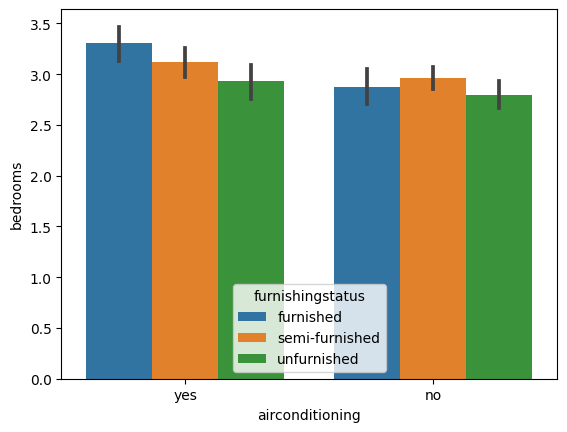

In [ ]:
#barplot based on airconditioning,bedrooms,furnishing status
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

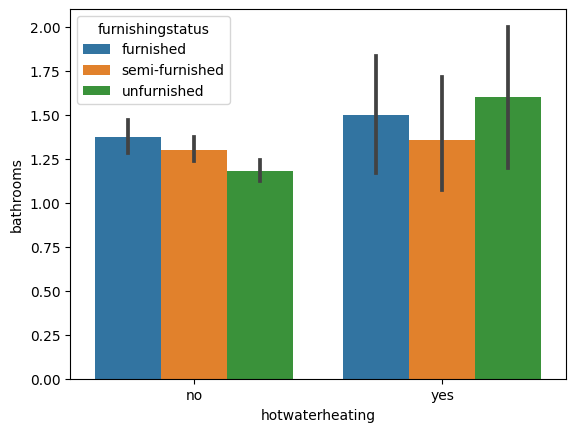

In [ ]:
#barplot based on hotwaterheating, bathrooms, furnishingstatus
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f69e25f2260>,
 'caps': [<matplotlib.lines.Line2D at 0x7f69e25f27d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f69e25f2110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f69e25f2d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f69e25f2fb0>],
 'means': []}

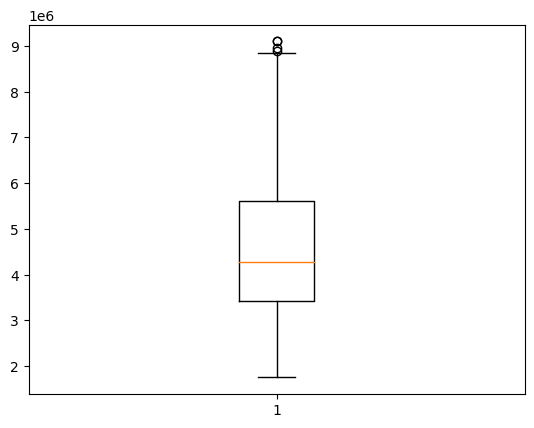

In [ ]:
# Dealing with outliers in price
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f69e245e350>,
 'caps': [<matplotlib.lines.Line2D at 0x7f69e245e890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f69e245e0b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f69e245edd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f69e245f070>],
 'means': []}

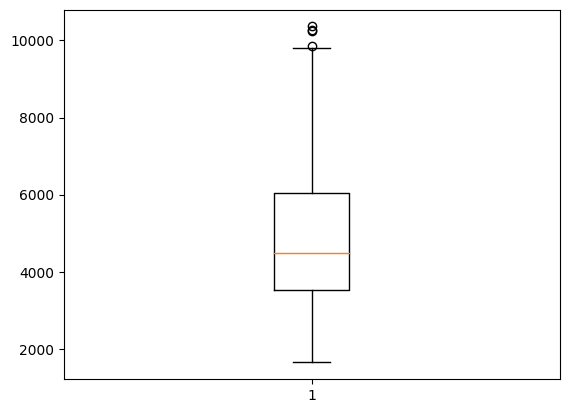

In [ ]:
# Dealing with outliers in srea

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

<Axes: xlabel='furnishingstatus', ylabel='price'>

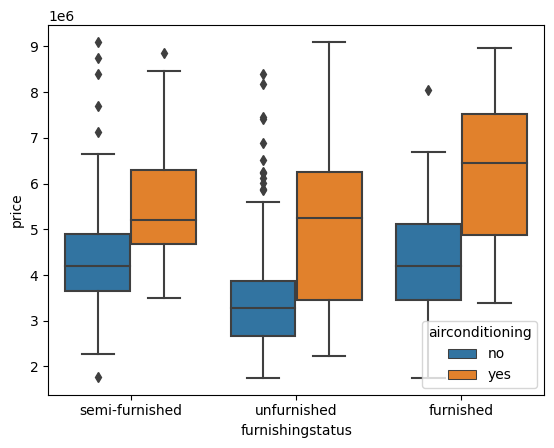

In [ ]:
#boxplot based on furnishing status,price, aircondition
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='bedrooms', ylabel='Density'>

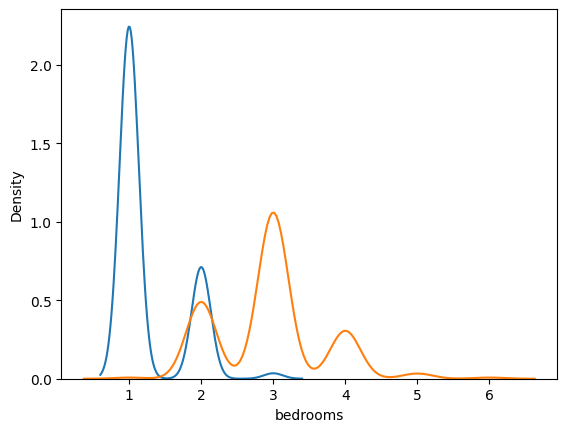

In [ ]:
#KDE plot for bathrooms and bedrooms
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

<Axes: xlabel='parking', ylabel='Density'>

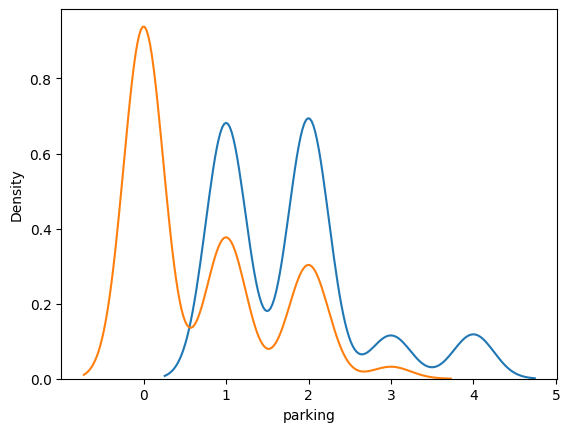

In [ ]:
#KDE plot for stories and parking
sns.distplot(df["stories"],hist=False)
sns.distplot(df["parking"],hist=False)

<Axes: >

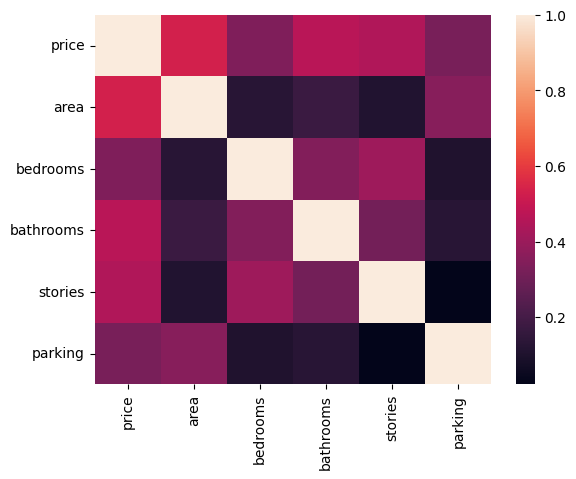

In [ ]:
#heatmap to visualize the correlation matrix of the DataFrame
sns.heatmap(df.corr())

<Axes: xlabel='area', ylabel='price'>

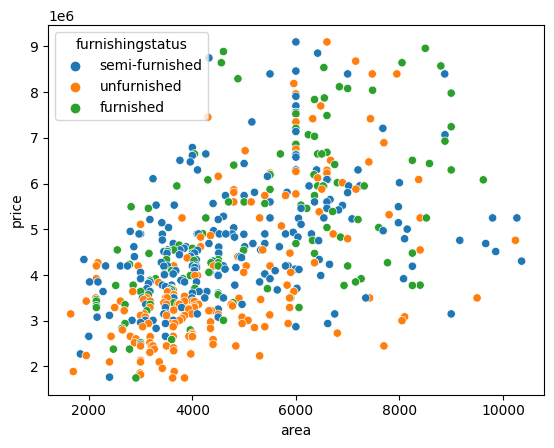

In [ ]:
#scatter plot to visualize the relationship between the price and area columns in the DataFrame
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

Feature Engineering

In [ ]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


In [ ]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Feature Scaling

In [ ]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Models Training

In [ ]:
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XGBoost' : xgb.XGBRegressor(), #Extreme Gradient Boosting Regressor
    'XGRF Regressor' : xgb.XGBRFRegressor(), #Extreme Gradient Boosting Random Forest Regressor
    'Support Vector regressor' : SVR(),
    'Lasso Reg' : Lasso(), #Least Absolute Shrinkage and Selection Operator
    'Ridge Reg' : Ridge(),
    'LGBM Reg' : LGBMRegressor(), #Light Gradient Boosting Machine Regressor
}

In [ ]:
pred ={}


for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 381, number of used features: 13
[LightGBM] [Info] Start training from score 4762406.272966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

Models Evaluation

Results for Random Forest Regressor : 
Mean Square Error : 1838062107721.9622
R2 Score : 0.573178093387193


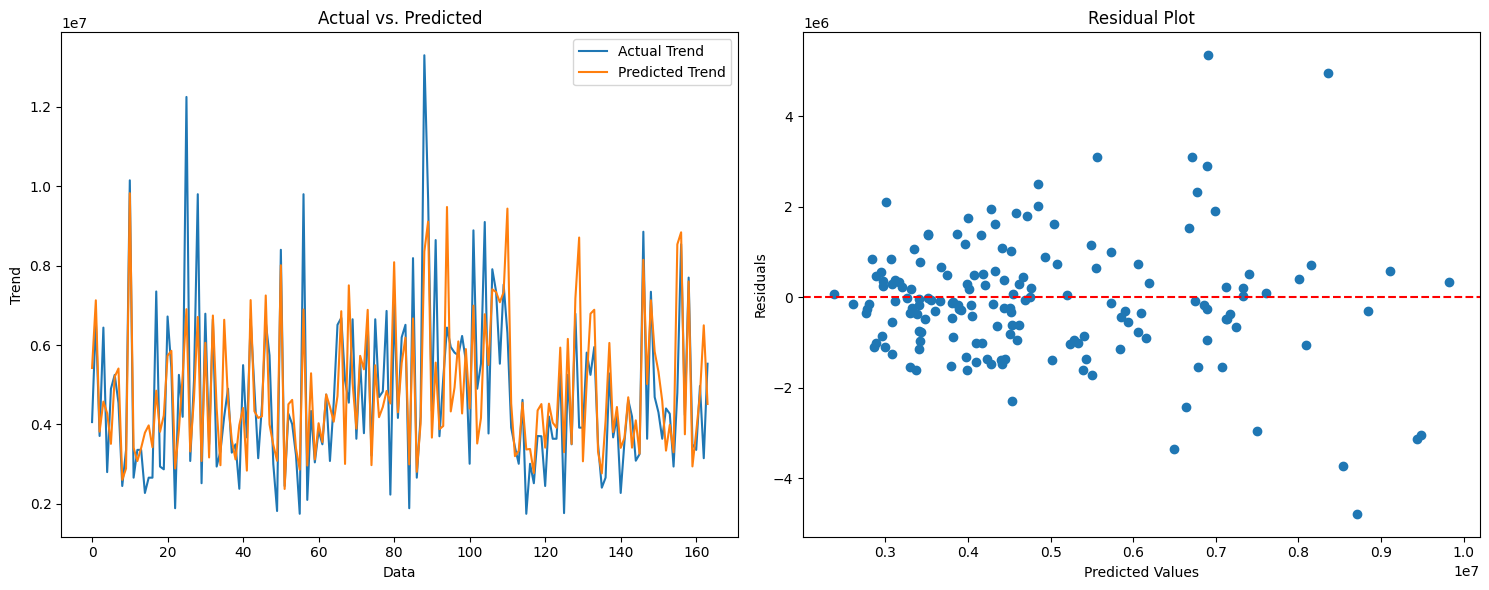

Results for Gradient Boost Regressor : 
Mean Square Error : 1611737062156.9988
R2 Score : 0.6257337100099587


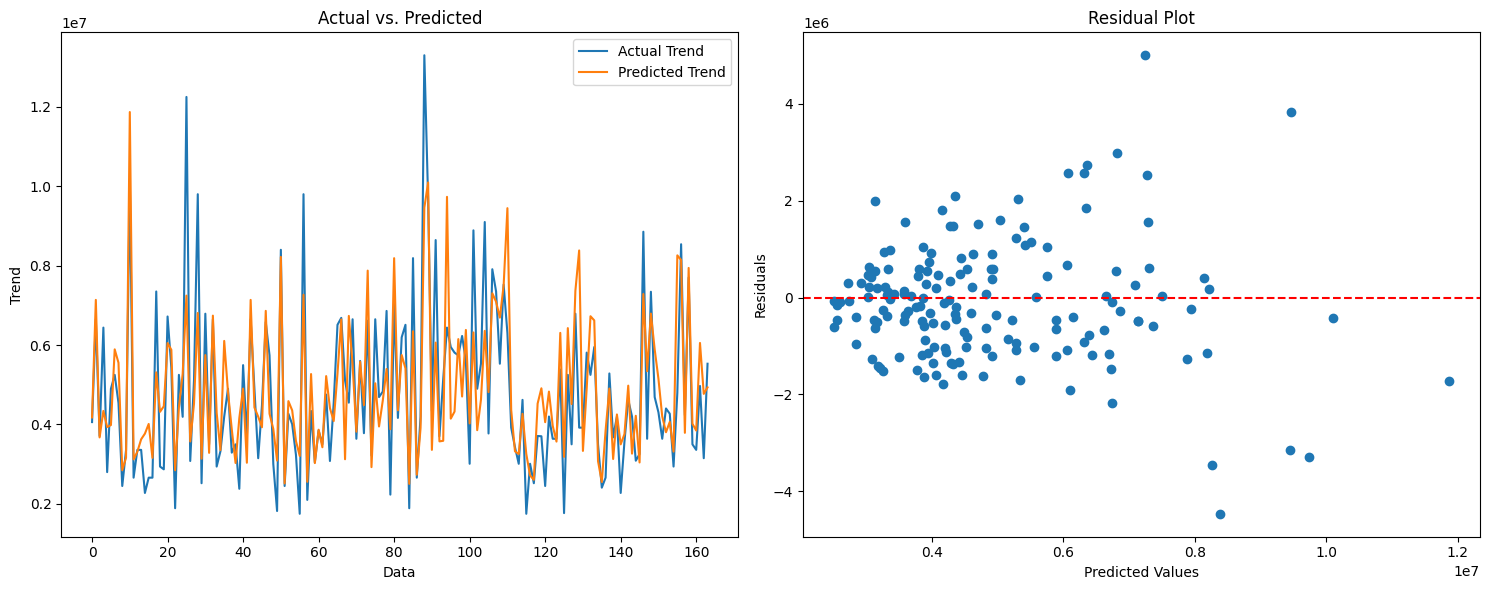

Results for XGBoost : 
Mean Square Error : 1655928196173.54
R2 Score : 0.6154719544375646


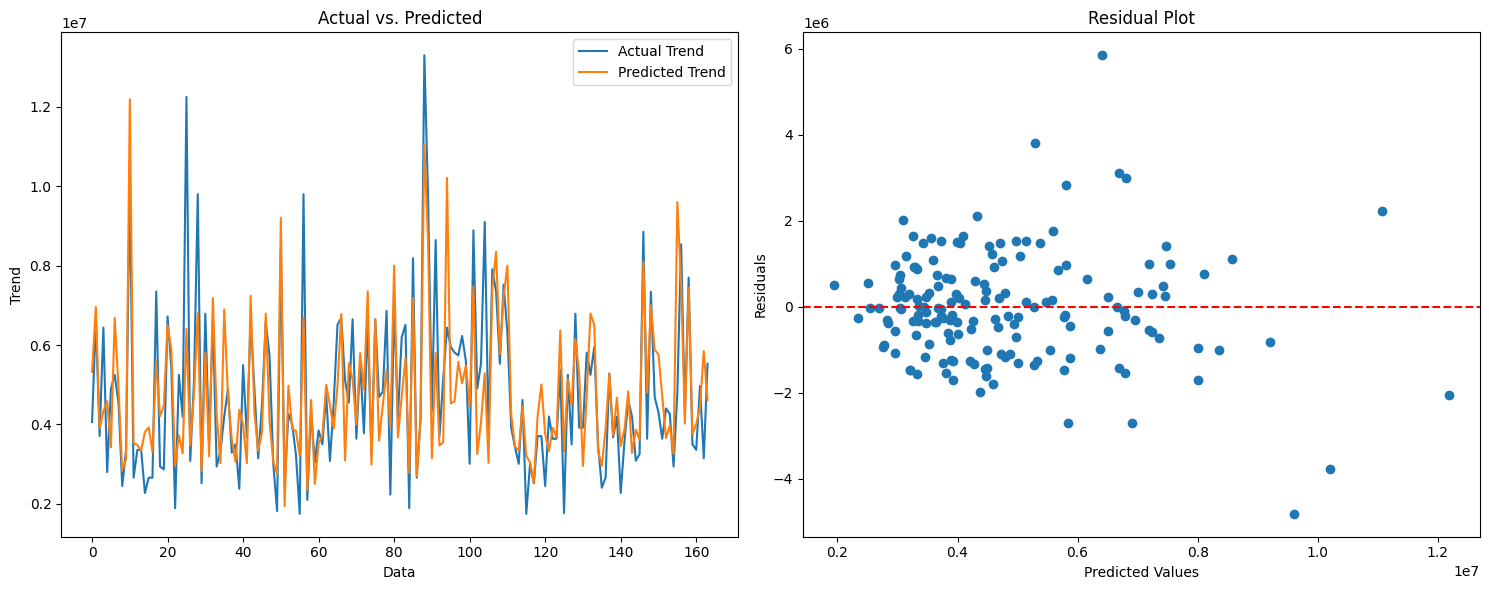

Results for XGRF Regressor : 
Mean Square Error : 2081873986786.9395
R2 Score : 0.5165618067882931


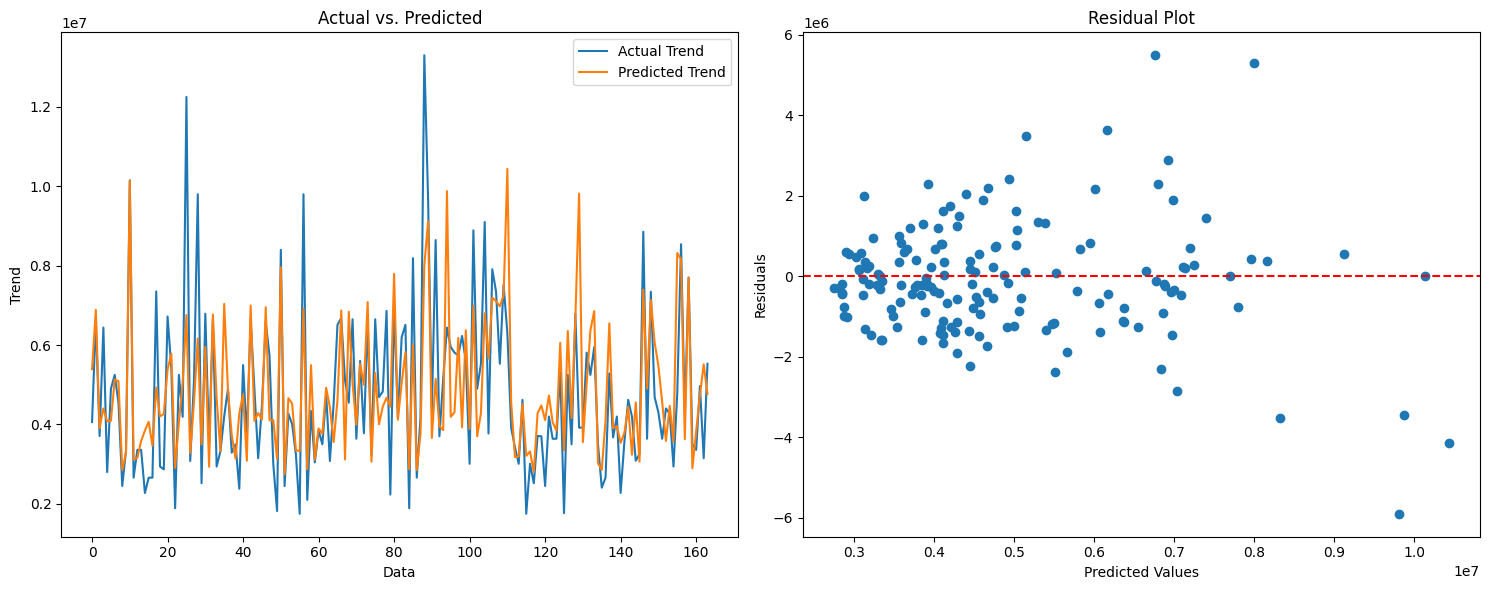

Results for Support Vector regressor : 
Mean Square Error : 4462165325262.905
R2 Score : -0.03617277335133684


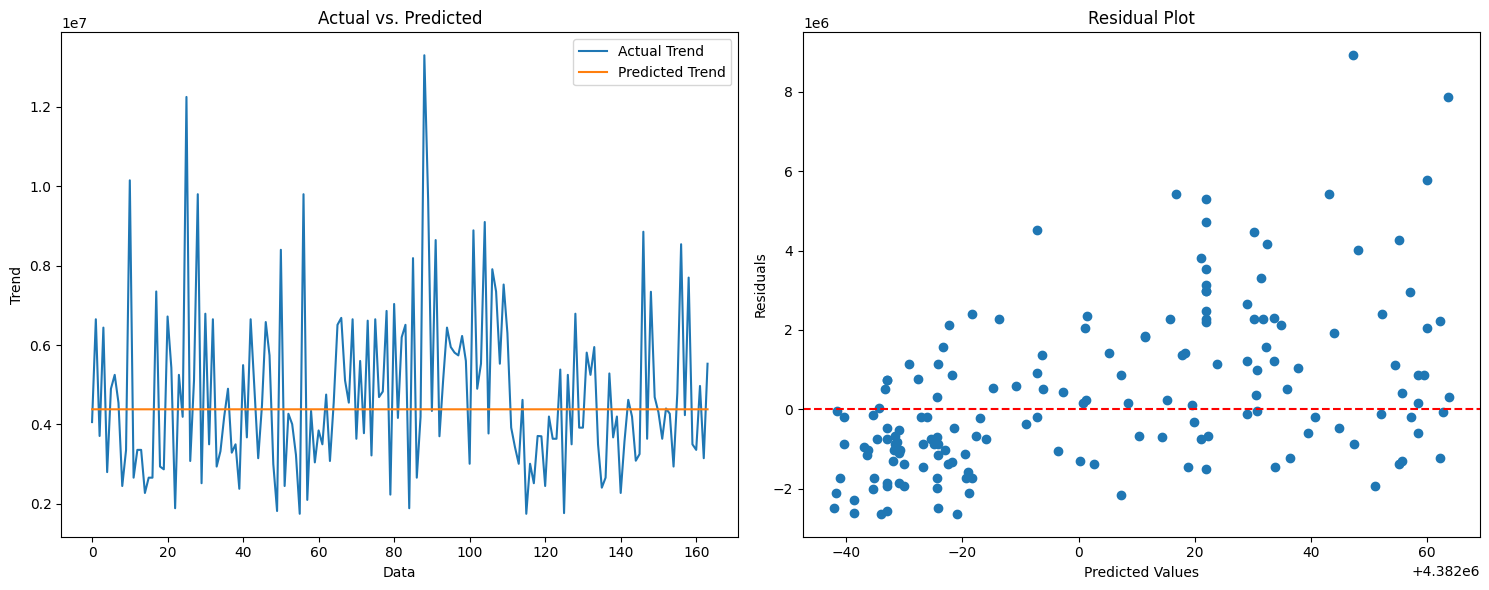

Results for Lasso Reg : 
Mean Square Error : 1523021266688.3394
R2 Score : 0.6463346705594011


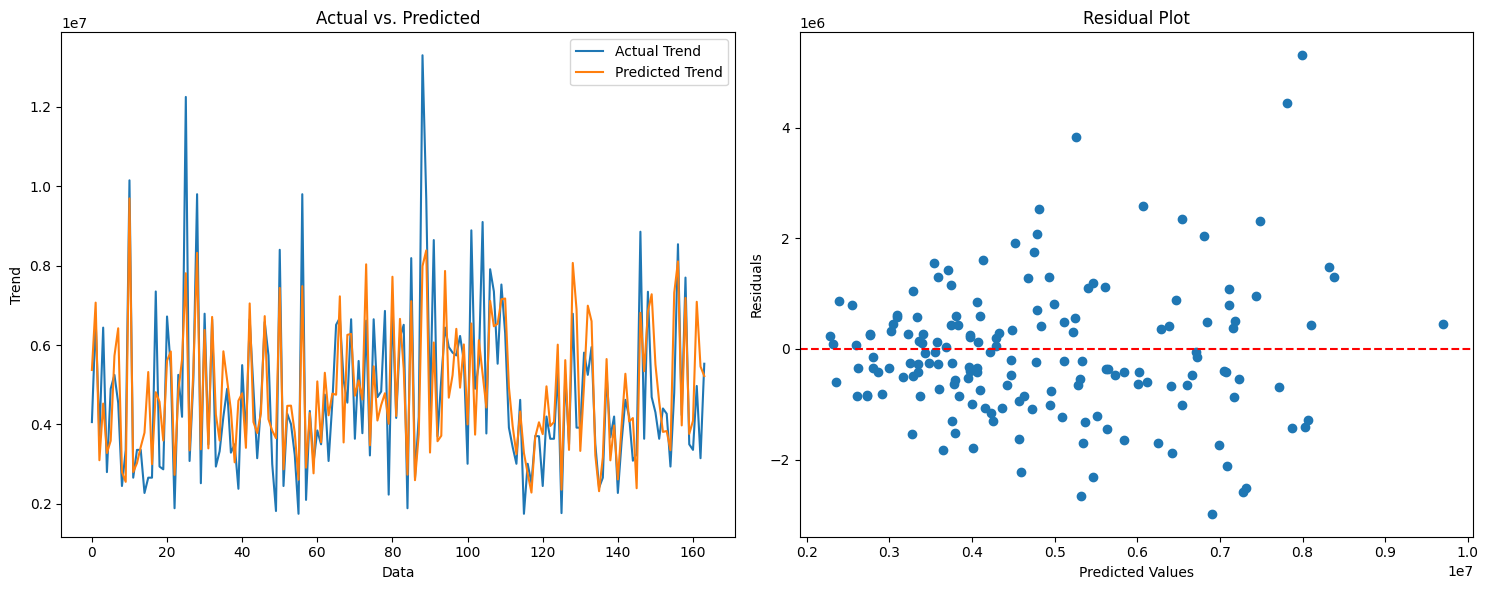

Results for Ridge Reg : 
Mean Square Error : 1525354840593.37
R2 Score : 0.6457927843743898


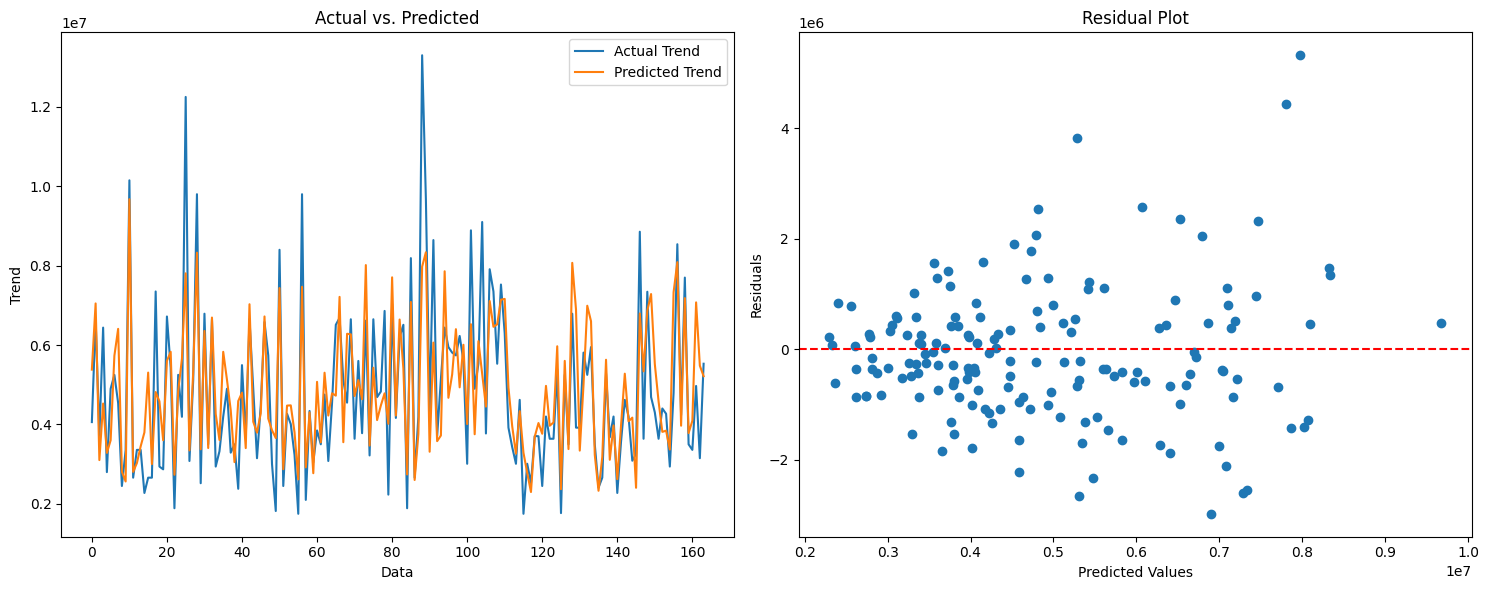

Results for LGBM Reg : 
Mean Square Error : 1602977666834.8694
R2 Score : 0.6277677554301107


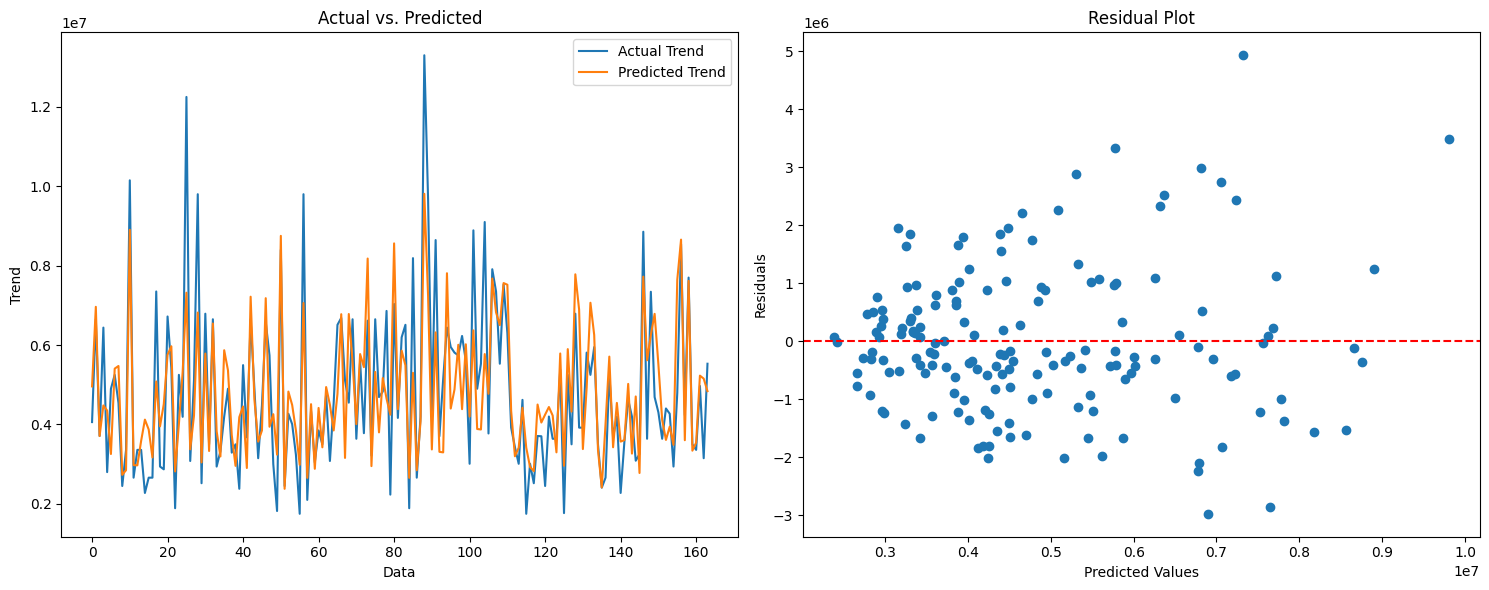

In [ ]:
acc= {}
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Error : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

Accuracy

In [ ]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
data

,Accuracy
Random Forest Regressor,0.573178
Gradient Boost Regressor,0.625734
XGBoost,0.615472
XGRF Regressor,0.516562
Support Vector regressor,-0.036173
Lasso Reg,0.646335
Ridge Reg,0.645793
LGBM Reg,0.627768


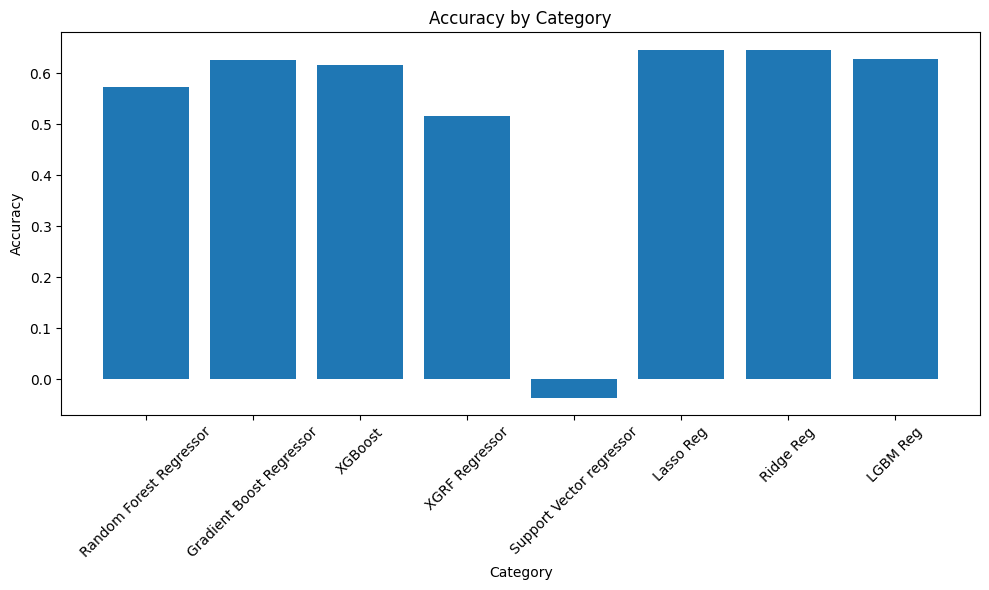

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['Accuracy'])
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.title('Accuracy by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()